<a href="https://colab.research.google.com/github/NurMohammad-collab/Nur_Mohammad/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: a5c7fae504544798b7c3532b706a32ba.asRWmqqLX9eDVaampnQDBrNk


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response


## 🌤️ Weather Data Functions

In [23]:
import requests

def get_weather_data(location, forecast_days=1):

    url = f"https://wttr.in/{location}?format=j1"
    response = requests.get(url)
    data = response.json()

    # Extract current temperature and precipitation
    current = data["current_condition"][0]
    current_temp = current["temp_C"]
    current_precip = current["precipMM"]

    forecast = []
    for day in data["weather"][:forecast_days]:
        total_precip = sum(float(hour["precipMM"]) for hour in day["hourly"])
        forecast.append({
            "date": day["date"],
            "avg_temp_C": day["avgtempC"],
            "total_precip_mm": total_precip
        })


    return {
        "location": location,
        "current": {
            "temperature_C": current_temp,
            "precipitation_mm": current_precip
        },
        "forecast": forecast
    }


## 📊 Visualisation Functions

In [14]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):

    forecast = weather_data["forecast"]

    dates = [entry["date"] for entry in forecast]
    temps = [float(entry["avg_temp_C"]) for entry in forecast]

    plt.plot(dates, temps, marker='o', color='orange', linewidth=2)
    plt.title(f"Average Daily Temperature in {weather_data['location']}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()

    if output_type == 'display':
        plt.show()
    elif output_type == 'save':
        plt.savefig("temperature_plot.png")
        print("Temperature graph saved as 'temperature_plot.png'.")

    plt.close()


In [26]:
import matplotlib.pyplot as plt

def create_precipitation_visualisation(weather_data, output_type='display'):

    forecast = weather_data["forecast"]

    # Extract dates and precipitation values
    dates = [entry["date"] for entry in forecast]
    precipitation = [float(entry["total_precip_mm"]) for entry in forecast]

    # Plot bars
    plt.bar(dates, precipitation, color='skyblue')
    plt.title(f"Total Daily Precipitation in {weather_data['location']}")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.grid(True, axis='y')

    # Show values on top of bars (even if 0)
    for i, val in enumerate(precipitation):
        plt.text(i, val + 0.05, str(val), ha='center', va='bottom')

    plt.tight_layout()

    if output_type == 'display':
        plt.show()
    elif output_type == 'save':
        plt.savefig("precipitation_plot.png")
        print("Precipitation graph saved as 'precipitation_plot.png'.")

    plt.close()


## 🤖 Natural Language Processing

In [28]:
# Define parse_weather_question() and generate_weather_response() here
import re

def parse_weather_question(question):

    question = question.lower()

    # Extract weather attribute
    if "temperature" in question:
        attribute = "temperature"
    elif "precipitation" in question:
        attribute = "precipitation"
    else:
        attribute = None

    # Extract time period
    if "today" in question:
        time_period = "today"
    elif "tomorrow" in question:
        time_period = "tomorrow"
    else:
        time_period = None

    location = re.sub(r'what is the|of|today|tomorrow|temperature|precipitation|\?', '', question)
    location = location.strip()

    return {
        "attribute": attribute,
        "location": location,
        "time_period": time_period
    }



## 🧭 User Interface

Welcome! Ask me a weather question like:
'What is the temperature of London today?' or 'What is the precipitation of Sydney tomorrow?'

Your question: What is the precipitation of Sydney tomorrow?


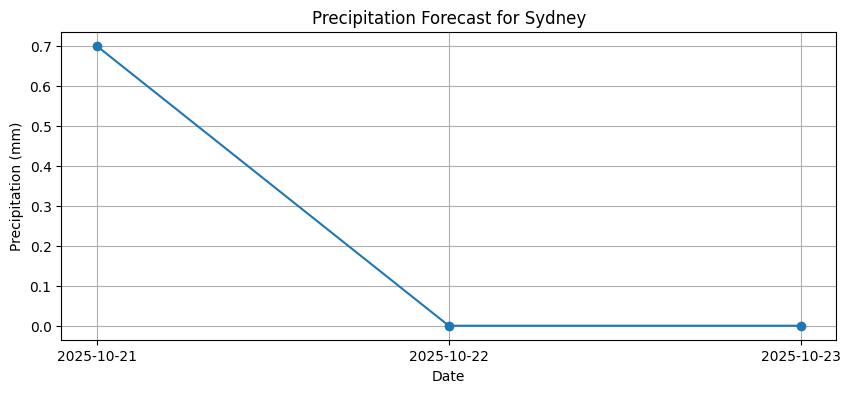

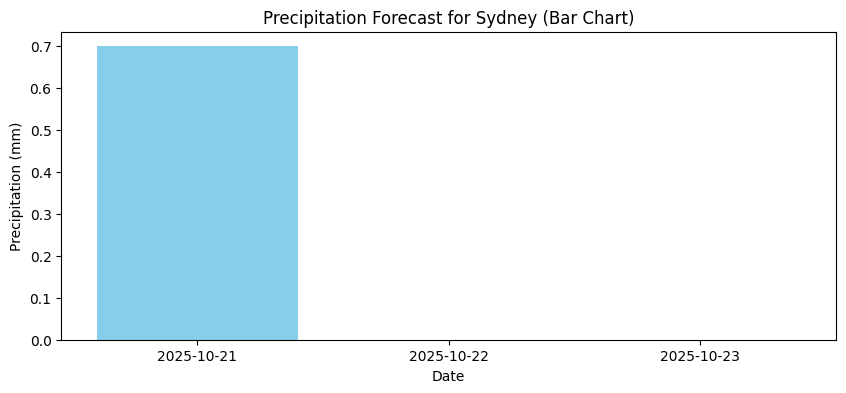


The precipitation in Sydney tomorrow is 0.0.


In [35]:
# Define menu functions using pyinputplus or ipywidgets here

# --- Step 3: Main function with pyinputplus ---
def main():
    print("Welcome! Ask me a weather question like:")
    print("'What is the temperature of London today?' or 'What is the precipitation of Sydney tomorrow?'")

    # Take user input
    question = pyip.inputStr(prompt="\nYour question: ")


    # Parse question
    parsed_q = parse_weather_question(question)

    location = parsed_q['location']
    weather_data = get_weather_data(location, 3)
    # Generate response
    response_text = generate_weather_response(parsed_q, weather_data)

    # Print response
    print("\n" + response_text)

# Run main
if __name__ == "__main__":
    main()

## 🧩 Main Application Logic

In [36]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def generate_weather_response(parsed_question, weather_data):

    attribute = parsed_question.get("attribute")
    location = parsed_question.get("location")
    time_period = parsed_question.get("time_period")

    if time_period == "today":
        data = weather_data["forecast"][0]
    elif time_period == "tomorrow":
        data = weather_data["forecast"][1]
    else:
        data = weather_data["forecast"][0]
    if attribute == "temperature":
        value = data.get("avg_temp_C", weather_data["current"]["temperature_C"])
        y_label = "Temperature (°C)"
    elif attribute == "precipitation":
        value = data.get("total_precip_mm", weather_data["current"]["precipitation_mm"])
        y_label = "Precipitation (mm)"
    else:
        value = None
        y_label = ""

    response = f"The {attribute} in {location.title()} {time_period} is {value}."

    dates = [weather_data["forecast"][i]["date"] for i in range(len(weather_data["forecast"]))]
    if attribute == "temperature":
        values = [int(weather_data["forecast"][i]["avg_temp_C"]) for i in range(len(weather_data["forecast"]))]
    else:
        values = [float(weather_data["forecast"][i]["total_precip_mm"]) for i in range(len(weather_data["forecast"]))]

    plt.figure(figsize=(10, 4))
    plt.plot(dates, values, marker='o')
    plt.title(f"{attribute.title()} Forecast for {location.title()}")
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.bar(dates, values, color='skyblue')
    plt.title(f"{attribute.title()} Forecast for {location.title()} (Bar Chart)")
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.show()

    return response



## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.